In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#Import data
info_csv = pd.read_csv('../data/complete_transformed_try.csv')

In [3]:
target = info_csv['malicious']
info_csv = info_csv.drop('malicious', axis=1)

In [4]:
info_csv.head()

,dport,country,having_ip_address,hostname_length,count_dir,count-www,fd_length,url_length,abnormal_url,count-http,...,count-digits,count-,count=,count-https,sus_url,count?,count%,short_url,count@,count_embed_domain
0,42712,0,True,13,1,0,6,33,1,1,...,15,0,0,0,0,0,0,0,0,0
1,59458,1,True,15,1,0,1,30,1,1,...,17,0,0,0,0,0,0,0,0,0
2,41156,1,True,12,1,0,6,32,1,1,...,14,0,0,0,0,0,0,0,0,0
3,54452,0,True,14,1,0,1,29,1,1,...,16,0,0,0,0,0,0,0,0,0
4,47324,0,True,12,1,0,6,32,1,1,...,14,0,0,0,0,0,0,0,0,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(info_csv, target, test_size=0.30)

In [6]:
pca = PCA(n_components=None)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
print(len(exp_var))

23


<BarContainer object of 23 artists>

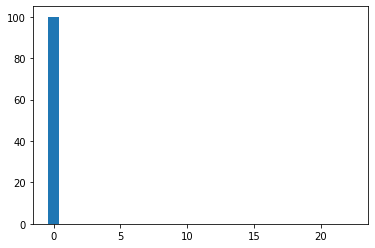

In [8]:
plt.bar(range(len(exp_var)), exp_var, align='center',
        label='Individual explained variance')

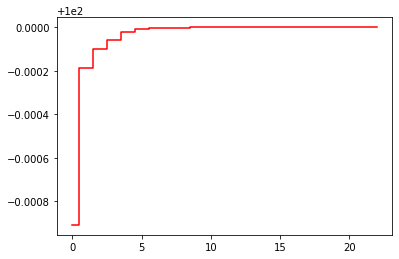

In [9]:
plt.step(range(len(cum_exp_var)), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

In [10]:
# Create an instance of the PCA class
pca2 = PCA(n_components=2)

In [11]:
# Fit the PCA model to your data
pca2.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
# Transform the data to the first two principal components
X_train_pca2 = pca2.transform(X_train)

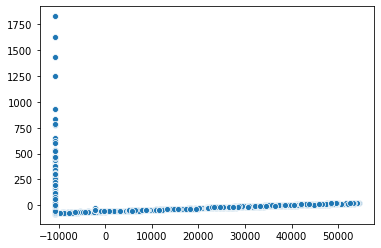

In [13]:
# Plot the transformed data
sns.scatterplot(X_train_pca2[:, 0], X_train_pca2[:, 1], palette=['green', 'blue'])
plt.show()

In [14]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_pca2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
X_test_pca2 = pca2.transform(X_test)

In [16]:
output_predictions = rfc.predict(X_test_pca2)

In [17]:
print(confusion_matrix(y_test,output_predictions))

[[10547    18]
 [   38 10506]]


In [18]:
print(classification_report(y_test,output_predictions))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10565
        True       1.00      1.00      1.00     10544

    accuracy                           1.00     21109
   macro avg       1.00      1.00      1.00     21109
weighted avg       1.00      1.00      1.00     21109

